In [ ]:
# Get Repo
!git clone https://github.com/minghanqin/LangSplat.git --recursive

#Get Model FIle
!gdown --id 1cjwE2hmaF1aSMjGsKM6_0pxNdUSMhqru

#Unzip Model File
!unzip /content/sofa.zip -d /content/sofa

%cd LangSplat

# Install PyTorch, torchvision, and torchaudio compatible with CUDA 12.2
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu122

# Install other dependencies
!pip install open-clip-torch==2.0 plyfile==0.8.1 tqdm opencv-python-headless tensorboard jaxtyping matplotlib typing-extensions pathlib

# Install submodules
!pip install -e submodules/segment-anything-langsplat
!pip install -e submodules/langsplat-rasterization
!pip install -e submodules/simple-knn


Cloning into 'LangSplat'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 132 (delta 30), reused 23 (delta 23), pack-reused 72 (from 1)
Receiving objects: 100% (132/132), 20.90 MiB | 41.88 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Submodule 'submodules/langsplat-rasterization' (https://github.com/minghanqin/langsplat-rasterization) registered for path 'submodules/langsplat-rasterization'
Submodule 'submodules/segment-anything-langsplat' (https://github.com/minghanqin/segment-anything-langsplat) registered for path 'submodules/segment-anything-langsplat'
Submodule 'submodules/simple-knn' (https://gitlab.inria.fr/bkerbl/simple-knn.git) registered for path 'submodules/simple-knn'
Cloning into '/content/LangSplat/submodules/langsplat-rasterization'...
remote: Enumerating objects: 44, done.        
remote: Counting objects: 100% (44/44), done.        
remote: Compressing objects: 

In [ ]:
!gdown --id 1eKBbqe2auwdFrKBw-zbLaKfAx0MUF_ix
!gdown --id 1B3Wtas_pdWitRM-OPUl2iYC5nTlDJhv-


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1eKBbqe2auwdFrKBw-zbLaKfAx0MUF_ix
From (redirected): https://drive.google.com/uc?id=1eKBbqe2auwdFrKBw-zbLaKfAx0MUF_ix&confirm=t&uuid=2e11aa15-b8f1-4246-9ea1-51f0c5823e0f
To: /content/LangSplat/teatime.zip
100% 919M/919M [00:05<00:00, 159MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1B3Wtas_pdWitRM-OPUl2iYC5nTlDJhv-
From (redirected): https://drive.google.com/uc?id=1B3Wtas_pdWitRM-OPUl2iYC5nTlDJhv-&confirm=t&uuid=ec3092a9-a199-4e55-b728-8498c7e49609
To: /content/LangSp

In [ ]:
!unzip ./teatime.zip -d ../teatime

import os
import shutil

# Define the source file and target directory
source_file = './sam_vit_h_4b8939.pth'
target_dir = './ckpts'

# Ensure the target directory exists
os.makedirs(target_dir, exist_ok=True)

# Define the destination file path
destination_file = os.path.join(target_dir, os.path.basename(source_file))

try:
    # Move the file
    shutil.move(source_file, destination_file)
    print(f"File moved to {destination_file}")
except FileNotFoundError:N
    print(f"Source file not found: {source_file}")
except Exception as e:
    print(f"An error occurred: {e}")

Archive:  ./teatime.zip
replace ../teatime/teatime/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: Source file not found: ./sam_vit_h_4b8939.pth


In [ ]:
!python preprocess.py --dataset_path ../teatime/teatime

/content/LangSplat/submodules/segment-anything-langsplat/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return > 0


True
1


In [ ]:
pip install open-clip --upgrade

ERROR: Could not find a version that satisfies the requirement open-clip (from versions: none)
ERROR: No matching distribution found for open-clip


In [ ]:
import open_clip
model, _, _ = open_clip.create_model_and_transforms(
    "ViT-B-16",  # e.g., ViT-B-16
    pretrained="laion2b_s34b_b88k",  # e.g., laion2b_s34b_b88k
    precision="fp16",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [ ]:
import open_clip

model_name = "ViT-B-16"
pretrained_options = open_clip.list_pretrained()

print(f"Available pretrained weights for {model_name}:")
for name in pretrained_options:
    if model_name in name:
        print(name)

Available pretrained weights for ViT-B-16:
('ViT-B-16', 'openai')
('ViT-B-16', 'laion400m_e31')
('ViT-B-16', 'laion400m_e32')
('ViT-B-16', 'laion2b_s34b_b88k')
('ViT-B-16', 'datacomp_xl_s13b_b90k')
('ViT-B-16', 'datacomp_l_s1b_b8k')
('ViT-B-16', 'commonpool_l_clip_s1b_b8k')
('ViT-B-16', 'commonpool_l_laion_s1b_b8k')
('ViT-B-16', 'commonpool_l_image_s1b_b8k')
('ViT-B-16', 'commonpool_l_text_s1b_b8k')
('ViT-B-16', 'commonpool_l_basic_s1b_b8k')
('ViT-B-16', 'commonpool_l_s1b_b8k')
('ViT-B-16', 'dfn2b')
('ViT-B-16', 'metaclip_400m')
('ViT-B-16', 'metaclip_fullcc')


In [ ]:
# !python render.py -m output/sofa-1 --include_feature

Looking for config file in output/sofa-1/cfg_args
Config file found: output/sofa-1/cfg_args
Rendering output/sofa-1
/home/qmh/code/gaussian-splatting/download/new_datasets/sofa [03/12 07:46:39]
Traceback (most recent call last):
  File "/content/LangSplat/render.py", line 88, in <module>
    render_sets(model.extract(args), args.iteration, pipeline.extract(args), args.skip_train, args.skip_test, args)
  File "/content/LangSplat/render.py", line 57, in render_sets
    scene = Scene(dataset, gaussians, shuffle=False)
  File "/content/LangSplat/scene/__init__.py", line 50, in __init__
    assert False, "Could not recognize scene type!"
AssertionError: Could not recognize scene type!


In [ ]:
# train the autoencoder
%cd autoencoder/
!python train.py --dataset_name ../../teatime/teatime --dataset_path ../../teatime/teatime --encoder_dims 256 128 64 32 3 --decoder_dims 16 32 64 128 256 256 512 --lr 0.0007
# get the 3-dims language feature of the scene
!python test.py --dataset_name ../../teatime/teatime --dataset_path ../../teatime/teatime
%cd ..

/content/LangSplat/autoencoder
2024-12-04 11:26:30.091522: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 11:26:30.108749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 11:26:30.129318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 11:26:30.135552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 11:26:30.150190: I tensorflow

In [ ]:
# train the autoencoder
%cd autoencoder/
# !python train.py --dataset_name ../../teatime/teatime --dataset_path ../../teatime/teatime --encoder_dims 256 128 64 32 3 --decoder_dims 16 32 64 128 256 256 512 --lr 0.0007
# get the 3-dims language feature of the scene
!python test.py --dataset_name ../../teatime/teatime --dataset_path ../../teatime/teatime
%cd ..

/content/LangSplat/autoencoder
loading checkpoint from ckpt/../../teatime/teatime/best_ckpt.pth
/content/LangSplat/autoencoder/test.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental

In [ ]:
!python train.py -s ../teatime/teatime -m output/ --start_checkpoint ../teatime/teatime/output/teatime/chkpnt30000.pth --feature_level 0


2024-12-04 11:42:06.450689: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 11:42:06.468247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 11:42:06.489255: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 11:42:06.495568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 11:42:06.510492: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python render.py -s ../teatime/teatime -m output/_0 --feature_level 0 --include_feature


Looking for config file in output/_0/cfg_args
Config file found: output/_0/cfg_args
Rendering output/_0
Reading camera 177/177 [04/12 13:37:13]
Loading Training Cameras [04/12 13:37:13]
Loading Test Cameras [04/12 13:37:16]
Number of points at initialisation :  25503 [04/12 13:37:16]
output/_0/chkpnt30000.pth [04/12 13:37:16]
/content/LangSplat/render.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.seriali

Image Gen


ModuleList(
  (0): Linear(in_features=512, out_features=256, bias=True)
  (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=64, out_features=32, bias=True)
  (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=3, bias=True)
) ModuleList(
  (0): Linear(in_features=3, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=128, bias=Tru

<ipython-input-142-5b82306d49e7>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


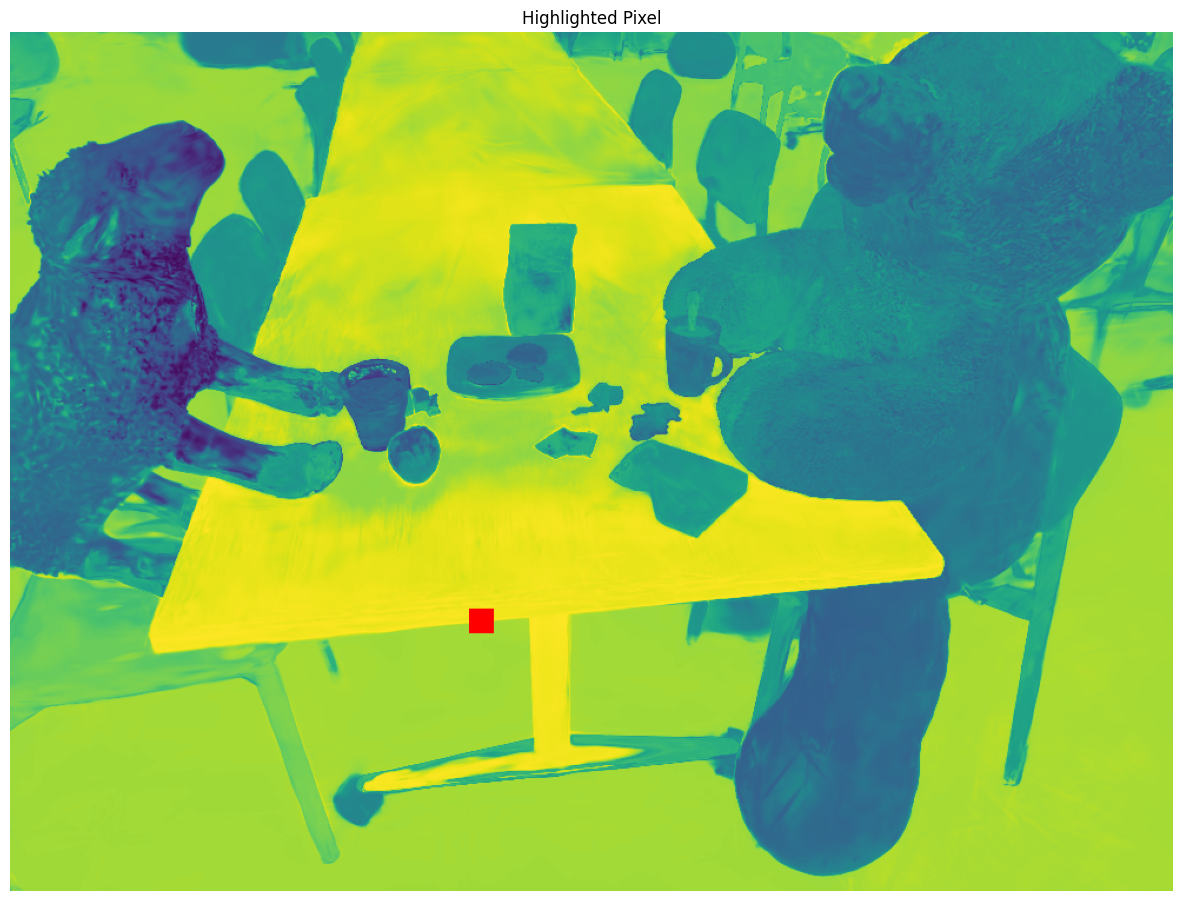

In [ ]:
from autoencoder.model import Autoencoder
import torch
import numpy as np


def process_image(image_num):
    # Load the image
    ac = Autoencoder([256, 128, 64, 32, 3], [16, 32, 64, 128, 256, 256, 512])

    checkpoint_path = "./teatime/teatime/best_ckpt.pth"
    checkpoint = torch.load(checkpoint_path)

    # Step 3: Load the state dictionary
    ac.load_state_dict(checkpoint)
    ac.eval()

    test_data1 = np.load(f'/content/LangSplat/output/_0/train/ours_None/renders_npy/{image_num}.npy')

    height, width, channels = test_data1.shape

    test_data1 = torch.from_numpy(test_data1).float().reshape(height * width, channels)

    test_data = ac.decode(test_data1)
    test_data = test_data.reshape(height, width, 512)

    test_data = test_data.detach().numpy()

    return test_data

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def highlight_pixel(test_data, pixel_row, pixel_col, highlight_size=20):
    test_data_norm = test_data / np.expand_dims(np.linalg.norm(test_data, axis=2), 2)
    specific_point = test_data_norm[pixel_row,pixel_col, :].reshape(1, 1, 512)
    dot_prod = np.sum(specific_point * test_data_norm, axis=2)
    # Assuming 'dot_prod' is the grayscale image (e.g., a 2D numpy array)
    # Example: image = np.random.uniform(-1, 1, (1024, 1024))  # Use your actual 'dot_prod'

    image = dot_prod  # Replace this with your actual image

    # Normalize the image to range [0, 1]
    image_normalized = (image - image.min()) / (image.max() - image.min()) # Normalizing from [-1, 1] to [0, 1]

    # Pixel to highlight
    highlight_row, highlight_col = pixel_row, pixel_col

    # Define the region around the pixel
    half_size = highlight_size // 2
    row_start = max(0, highlight_row - half_size)
    row_end = min(image.shape[0], highlight_row + half_size + 1)
    col_start = max(0, highlight_col - half_size)
    col_end = min(image.shape[1], highlight_col + half_size + 1)

    # Create an RGB image using a colormap
    cmap = plt.cm.viridis  # Use the 'viridis' colormap
    norm = mcolors.Normalize(vmin=0, vmax=1)  # Normalize the grayscale values
    image_rgb = cmap(norm(image_normalized))[:, :, :3]  # Convert grayscale to RGB

    # Set the region to bright red
    image_rgb[row_start:row_end, col_start:col_end] = [1, 0, 0]  # RGB for bright red

    # Plot the image
    plt.figure(figsize=(15, 15))
    plt.imshow(image_rgb)
    plt.title("Highlighted Pixel")
    plt.axis('off')
    plt.show()

test_data = process_image('00000')
highlight_pixel(test_data, 500, 400)


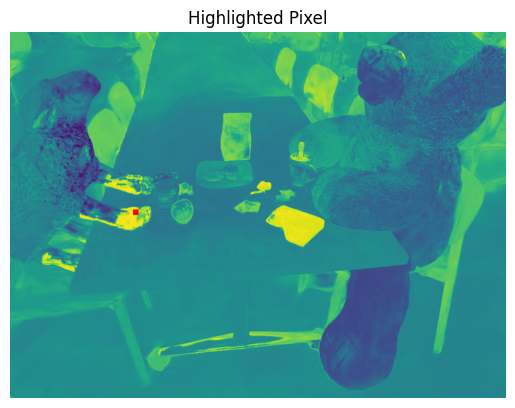

In [ ]:
highlight_pixel(test_data, 360, 250)

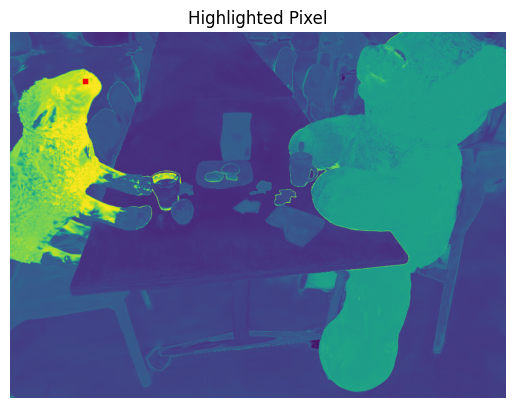

In [ ]:
highlight_pixel(test_data, 100, 150)

In [ ]:
import shutil

# Path to the folder you want to delete
folder_path = '/content/LangSplat/output/_0/train/ours_None'

# Delete the folder and all its contents
shutil.rmtree(folder_path)

print(f"Folder {folder_path} has been deleted.")


Folder /content/LangSplat/output/_0/train/ours_None has been deleted.


In [ ]:
import os
import shutil

# Define the paths
output_dir = './output'
teatime_dir = os.path.join(output_dir, 'teatime')

# Create the ./output/teatime directory
if not os.path.exists(teatime_dir):
    os.makedirs(teatime_dir)

# Move all files and subdirectories in ./output into ./output/teatime
for item in os.listdir(output_dir):
    # Get the full path for the current item
    item_path = os.path.join(output_dir, item)

    # Skip moving the newly created teatime directory
    if item_path == teatime_dir:
        continue

    # Move the item into the teatime directory
    shutil.move(item_path, os.path.join(teatime_dir, item))


In [ ]:
!cd output

arguments    convert.py		   gaussian_renderer  preprocess.py  scene	  train.py
assets	     corrected_splats.zip  LICENSE.md	      process.sh     submodules   utils
autoencoder  environment.yml	   lpipsPyTorch       README.md      teatime
ckpts	     eval		   output	      render.py      teatime.zip


In [ ]:
import shutil
from google.colab import files

# Define the folder and zip file paths
folder_path = '../teatime'
zip_file_path = '/content/teatime.zip'

# Zip the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

# Download the zip file
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!gdown --id 1MqKTNP1CJ55P_Ww7MQzuEl11ezBzSU68

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1MqKTNP1CJ55P_Ww7MQzuEl11ezBzSU68
From (redirected): https://drive.google.com/uc?id=1MqKTNP1CJ55P_Ww7MQzuEl11ezBzSU68&confirm=t&uuid=e5fc8e8d-7e31-4929-9c6a-876eeb7291d3
To: /content/LangSplat/corrected_splats.zip
100% 1.97G/1.97G [00:12<00:00, 158MB/s]


In [ ]:
!unzip ./corrected_splats.zip -d ../corrected_splats

Archive:  ./corrected_splats.zip
   creating: ../corrected_splats/point_cloud/
  inflating: ../corrected_splats/events.out.tfevents.1733282074.0f0287b48fcc.6508.0  
  inflating: ../corrected_splats/cfg_args  
  inflating: ../corrected_splats/chkpnt100.pth  
  inflating: ../corrected_splats/exposure.json  
  inflating: ../corrected_splats/chkpnt30000.pth  
  inflating: ../corrected_splats/cameras.json  
  inflating: ../corrected_splats/input.ply  
   creating: ../corrected_splats/point_cloud/iteration_30000/
   creating: ../corrected_splats/point_cloud/iteration_7000/
  inflating: ../corrected_splats/point_cloud/iteration_7000/point_cloud.ply  
  inflating: ../corrected_splats/point_cloud/iteration_30000/point_cloud.ply  


In [ ]:
import shutil
import os

# Define the paths
output_dir = './output'
corrected_splats_dir = '../corrected_splats'

# Check if output directory exists and delete it
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

# Copy the contents of corrected_splats to output
shutil.copytree(corrected_splats_dir, output_dir)


'./output'

In [ ]:
import shutil
import os

# Define the paths
output_dir = './output'
teatime_output_dir = './output/teatime'
final_output_dir = '../teatime/teatime/output/teatime'

# # Step 1: Create './output/teatime' if it doesn't exist
# if not os.path.exists(teatime_output_dir):
#     os.makedirs(teatime_output_dir)

# # Step 2: Move files from './output' to './output/teatime'
# for item in os.listdir(output_dir):
#     s = os.path.join(output_dir, item)
#     d = os.path.join(teatime_output_dir, item)
#     if os.path.isdir(s):
#         shutil.move(s, d)
#     else:
#         shutil.move(s, d)

# Step 3: Copy the contents of './output/teatime' to '../teatime/teatime/output/teatime'
if os.path.exists(final_output_dir):
    shutil.rmtree(final_output_dir)  # Remove the existing directory if necessary

shutil.copytree(output_dir, final_output_dir)


'../teatime/teatime/output/teatime'

In [ ]:
import time

In [ ]:
while True:
  time.sleep(10)

KeyboardInterrupt: 

In [ ]:
!ls

arguments    ckpts	      eval		 lpipsPyTorch	process.sh  scene	teatime.zip
assets	     convert.py       gaussian_renderer  output		README.md   submodules	train.py
autoencoder  environment.yml  LICENSE.md	 preprocess.py	render.py   teatime	utils


EXAMINING FEATURES

In [ ]:
import numpy as np
test_data = np.load('/content/teatime/teatime/language_features/frame_00100_f.npy')

In [ ]:
test_data.shape

(86, 512)

In [ ]:
import numpy as np
test_data = np.load('/content/LangSplat/output/_0/train/ours_None/renders_npy/00000.npy')

In [ ]:
test_data.shape

(730, 988, 3)

In [ ]:
while True:
  time.sleep(1)

KeyboardInterrupt: 

In [ ]:
test_data

array([[[ 0.06896631,  0.34064817, -0.41005844],
        [ 0.05850791,  0.36272746, -0.398392  ],
        [ 0.0543533 ,  0.37634668, -0.3844219 ],
        ...,
        [ 0.11808381, -0.14512742,  0.4814875 ],
        [ 0.11793116, -0.14536925,  0.5064044 ],
        [ 0.11602837, -0.1021999 ,  0.54186183]],

       [[ 0.0601589 ,  0.3767899 , -0.41429263],
        [ 0.05073904,  0.40292794, -0.39861274],
        [ 0.04227916,  0.41697922, -0.37674642],
        ...,
        [ 0.12351498, -0.13410929,  0.48049027],
        [ 0.12206947, -0.12667206,  0.50417924],
        [ 0.11998947, -0.07068974,  0.5462409 ]],

       [[ 0.06147534,  0.39642528, -0.40509224],
        [ 0.0531504 ,  0.42627886, -0.39086294],
        [ 0.04499288,  0.44943818, -0.37566823],
        ...,
        [ 0.12949811, -0.11714722,  0.480336  ],
        [ 0.12941259, -0.0938672 ,  0.50562143],
        [ 0.12630717, -0.03665815,  0.55461496]],

       ...,

       [[ 0.233222  ,  0.75689363,  0.11460173],
        [ 0

In [ ]:
from autoencoder.model import Autoencoder
import torch
import numpy as np

ac = Autoencoder([256, 128, 64, 32, 3], [16, 32, 64, 128, 256, 256, 512])

checkpoint_path = "./teatime/teatime/best_ckpt.pth"
checkpoint = torch.load(checkpoint_path)

# Step 3: Load the state dictionary
ac.load_state_dict(checkpoint)


test_data = np.load('/content/LangSplat/output/_0/train/ours_None/renders_npy/00000.npy')

height, width, channels = test_data.shape

test_data = torch.from_numpy(test_data).float().permute(2, 0, 1).reshape(height * width, channels)

test_data = ac.decode(test_data)



ModuleList(
  (0): Linear(in_features=512, out_features=256, bias=True)
  (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=64, out_features=32, bias=True)
  (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=3, bias=True)
) ModuleList(
  (0): Linear(in_features=3, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=128, bias=Tru

<ipython-input-116-53841776d722>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


In [ ]:
while True:
  time.sleep(1)